# `common_Dst_constr`
# Fit the complete data (With sWeights and without sWeights)
- Fit on $m(B^0_s)$ with $m(3\pi)$ around $m(D_s)$ and sWeights
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (gaussian)
    - Background of partially reconstructed decays (gaussian)
    - Combinatorial background (exponential)
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$ (sum of two Crystall ball PDF)
        - **FINAL CHOICE: $\alpha_L$, $\alpha_R$, $n_L$ free, $n_R$ fixed**
    - Background $B^0 \to D^{*-} D_s^+$ from the other fit of the simultaneous fit
    - Background with a misidentified pion: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$ (sum of two crystall ball PDF)
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$ (gaussian)
    - Combinatorial background (exponential)

Those two fits are not simultaneous

## Import

In [1]:
import zfit
import timeit


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, retrieve_pickle, add_constr_Dst
from plot.fit import plot_hist_fit_particle
import plot.histogram as h
from fit import launch_fit, define_zparams, save_params, retrieve_params, sum_crystalball

Welcome to JupyROOT 6.22/02


## Load

In [2]:
df = load_data(years, magnets, type_data='common', vars=['B0_M','tau_M', 'Dst_M'],
                            cut_DeltaM=True)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//common/data/data_90000000_2016_down.root
cut on DeltaM has removed 425088 over 935261 events


In [3]:
# Mean of the distribution of the partially reconstructed data
mu2_p = retrieve_params('all_data_strip', name_folder='data_strip_p')['mu2']

In [4]:
df = add_constr_Dst(df)
var = 'Dst_constr_B0_M'

In [5]:
name_data = 'common_Dst_constr'
name_data_B0toDs3pi = 'common_B0toDstDs'

name_data_MC = 'MC_constr_opposedCB_sharedMean'
name_data_KPiPi = "data_KPiPi_constr"

## Fit on weighted `B0_M` with `|tau_M-1969|<50`
SAME AS WITHOUT CONSTRAIN !

## Fit on the full `B0_M`

In [6]:
low = 5150.
high = 5545.

### Data

In [7]:
data_KPiPi_params = retrieve_params(name_data_KPiPi, name_folder='data_KPiPi') # already in MeV   
data_B0Ds_params = retrieve_params(name_data_B0toDs3pi, name_folder=name_data_B0toDs3pi)   
MC_param_results = retrieve_params(name_data_MC, name_folder='MC') 

### Distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_constr_B0_M_common_Dst_constr


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>)

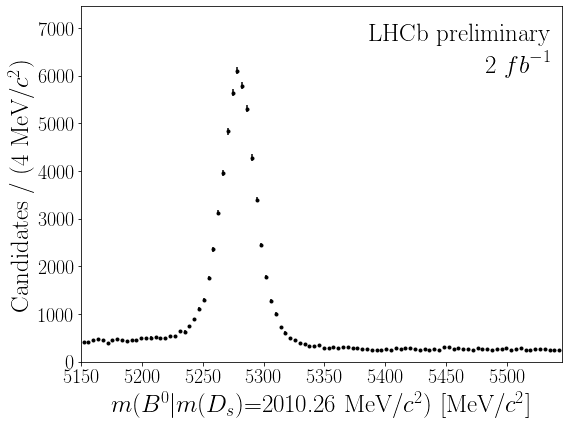

In [8]:
h.plot_hist_particle({name_data:df},var,
              low = low, high = high,
              n_bins = 100, mode_hist = False, colors='black', pos_text_LHC='right')

### Initial values

In [9]:
MC_param_results

{'alphaL_MC': 1.433605382929193,
 'alphaL_MC_err': 0.205208204845077,
 'alphaR_MC': -1.4243771075078335,
 'alphaR_MC_err': 0.18596738945628238,
 'frac_MC': 0.6265428034269498,
 'frac_MC_err': 0.14808754795260973,
 'mu_MC': 5280.029334833117,
 'mu_MC_err': 0.12784933837259851,
 'nL_MC': 1.9567213823685434,
 'nL_MC_err': 0.34720813324599803,
 'nR_MC': 5.840596424652496,
 'nR_MC_err': 2.418176178376309,
 'sigmaL_MC': 11.870261328699524,
 'sigmaL_MC_err': 0.8508015260213404,
 'sigmaR_MC': 12.431503310005523,
 'sigmaR_MC_err': 1.8452371317350473}

In [10]:
n_events_B0_M = len(df.query(f'B0_M > {low} and B0_M < {high}'))

# n_sig        57210     +/- 7.6e+02       False
# r_bkgK    0.004348     +/-   0.023       False
# n_bkg        26110     +/- 3.9e+02       False
# frac        0.4397     +/-   0.029       False
# alphaL       1.514     +/-    0.12       False
# mu            5279     +/-    0.11       False
# nL          0.4895     +/-   0.083       False
# sigmaL        11.5     +/-    0.36       False
# sigmaR       16.34     +/-    0.69       False
# lambda  -4.192e-06     +/-   4e-05       False

# alphaL, nL
n_sig_k = 57000
n_bkg_k = 26000
r_bkgK_k = 0.03
initial_values = {
    # Signal        
    'mu'       :{ 'value': 5279.                         , 'low': 5279.-3.       , 'high': 5279.+3.             , 'floating': True},
    'sigmaL'   :{ 'value': 11.                           , 'low': 5.             , 'high': 15.                  , 'floating': True},
    'sigmaR'   :{ 'value': 19.                           , 'low': 15.            , 'high': 25.                  , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'] , 'low': 0.1            , 'high': 10.                  , 'floating': True},
    'alphaR'   :{ 'value': MC_param_results['alphaR_MC'] , 'low': -10.           , 'high': -0.1                 , 'floating': True},
    'nL'       :{ 'value': MC_param_results['nL_MC']     , 'low': 0.1            , 'high': 10.                  , 'floating': True},
    'nR'       :{ 'value': MC_param_results['nR_MC']      , 'low': 1.             , 'high': 70.                 , 'floating': False},
    'frac'     :{ 'value': 0.5                           , 'low': 0.1            , 'high': 1.                   , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                       , 'low': n_sig_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Combinatorial background        
    'lambda'   :{ 'value': -0.00004                      , 'low': -0.001         , 'high': -0.00000001          , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                       , 'low': n_bkg_k*0.5    , 'high': n_events_B0_M        , 'floating': True},
    # Background decay D*Kpipi    
    'r_bkgK'   :{ 'value': r_bkgK_k                      , 'low': 0.0001          , 'high': 0.08                , 'floating': True},
}

for variable in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    initial_values[f'{variable}_K'] = {'value': data_KPiPi_params[variable], 'low': None, 'high': None, 'floating': False}

for variable in 'mu', 'sigma', 'n_sig' :
    initial_values[f'{variable}_DsB0'] = {'value': data_B0Ds_params[f'{variable}_B0Ds'], 'low': None, 'high': None, 'floating': False}

In [11]:
MC_param_results

{'alphaL_MC': 1.433605382929193,
 'alphaL_MC_err': 0.205208204845077,
 'alphaR_MC': -1.4243771075078335,
 'alphaR_MC_err': 0.18596738945628238,
 'frac_MC': 0.6265428034269498,
 'frac_MC_err': 0.14808754795260973,
 'mu_MC': 5280.029334833117,
 'mu_MC_err': 0.12784933837259851,
 'nL_MC': 1.9567213823685434,
 'nL_MC_err': 0.34720813324599803,
 'nR_MC': 5.840596424652496,
 'nR_MC_err': 2.418176178376309,
 'sigmaL_MC': 11.870261328699524,
 'sigmaL_MC_err': 0.8508015260213404,
 'sigmaR_MC': 12.431503310005523,
 'sigmaR_MC_err': 1.8452371317350473}

### Observables and variables

In [12]:
obs = zfit.Space("x", limits=(low, high))

zparams = define_zparams(initial_values)

# Composed parameter
mult = lambda r, n: r*n
zparams["n_bkgK"] = zfit.ComposedParameter("n_bkgK", mult, params=[zparams['r_bkgK'],zparams['n_sig']])

In [13]:
name_params = {
    # Signal
    'mu'      : '$\mu_S$',
    'sigmaL'  : '$\\sigma_{L_S}$',
    'sigmaR'  : '$\\sigma_{R_S}$',    
    'alphaL'  : '$\\alpha_{L_S}$',
    'alphaR'  : '$\\alpha_{R_S}$',
    'nL'      : '$n_{L_S}$',
    'nR'      : '$n_{R_S}$',
    'frac'    : '$f_{S, \\frac{L}{R}}$',
    'n_sig'   : '$n_S$',
    # Combinatorial background
    'n_bkg'   : '$n_{B,c}$',
    'lambda'  : '$\\lambda_{B,c}$',
    # Partially reconstructed brackground
    'mu2'     : '$\\mu_{B,D^*3\pi h}$',
    'sigma2'  : '$\\sigma_{B,D^*3\pi h}$',
    'n_bkg2'  : '$n_{B,D^*3\pi h}$',
    # Background decay D*Kpipi    
    'n_bkgK'  : '$n_{B,D^*K\pi\pi}$',
    'r_bkgK'  : '$\\frac{n_{B,D^*K\pi\pi}}{n_S}$',
}


### PDFs

In [14]:
model_S, crystalBallL_S, crystalBallR_S = sum_crystalball(zparams['mu'], zparams['mu'],
                                                          zparams['sigmaL'], zparams['sigmaR'],
                                                          zparams['frac'], obs,                                                          
                                                          zparams['alphaL'], zparams['alphaR'], 
                                                          zparams['nL'], zparams['nR']
                                                         )


gaussian_B0Ds = zfit.pdf.Gauss(zparams['mu_DsB0'],zparams['sigma_DsB0'],obs=obs)

model_K, crystalBallL_K, crystalBallR_K = sum_crystalball(zparams['muL_K'], zparams['muR_K'], 
                                                          zparams['sigmaL_K'], zparams['sigmaR_K'],
                                                          zparams['fraction_K'], obs,
                                                          zparams['alphaL_K'], zparams['alphaR_K'], 
                                                          zparams['nL_K'], zparams['nR_K'])

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
# gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)


model_S_ext = model_S.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
# gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
gaussian_B0Ds_ext = gaussian_B0Ds.create_extended(zparams['n_sig_DsB0'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, model_K_ext, exp_ext]) # gauss is folded by frac
#model = zfit.pdf.SumPDF([model_S_ext, gaussian_B0Ds_ext, gaussian_ext, model_K_ext, exp_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df[var], obs=obs)

### Fit

In [15]:
import timeit
start = timeit.default_timer()
result, params = launch_fit(model, data, extended=True)
result, params = launch_fit(model, data, extended=True)
result, params = launch_fit(model, data, extended=True)
stop = timeit.default_timer()
print('Time to do the fit: ', stop - start) 

------------------------------------------------------------------
| FCN = -4.312e+05              |     Ncalls=898 (898 total)     |
| EDM = 0.000976 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse    at limit
------  ----------  --------------  ----------
n_sig        54430     +/- 1.3e+03       False
r_bkgK      0.0348     +/-   0.016       False
n_bkg   

**All free**: unstable

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:503: UserWarning: The function <function Space.limits at 0x7f0fadf0b5f0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:32: UserWarning: The function <function Space.area at 0x7f0fadf129e0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5545.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  11
Reduced chi2:  1.221342725039469


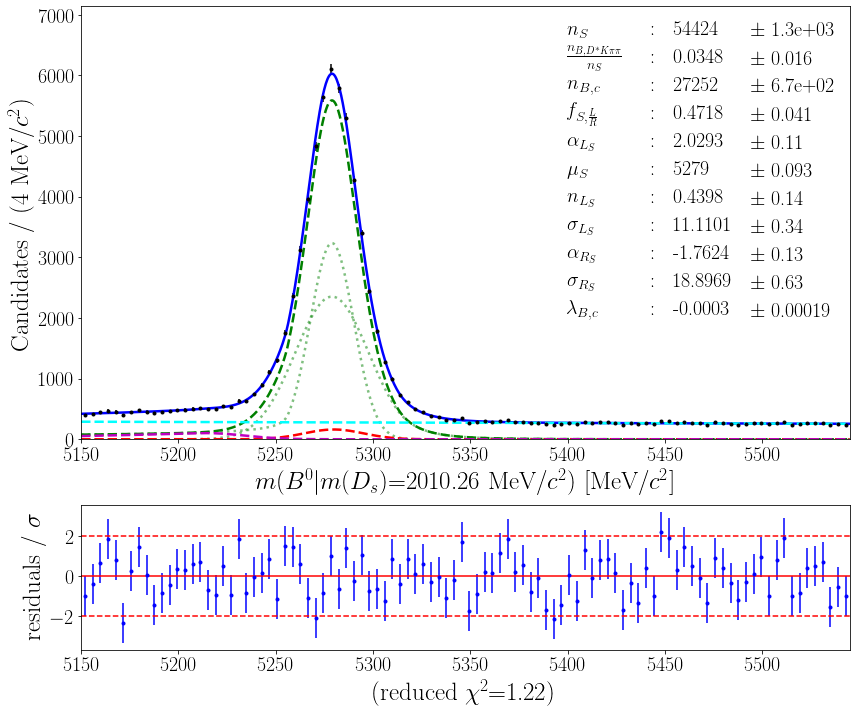

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/Dst_constr_B0_M_common_Dst_constr_details_fit
Number of d.o.f. in the model:  11
Reduced chi2:  1.221342725039469


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


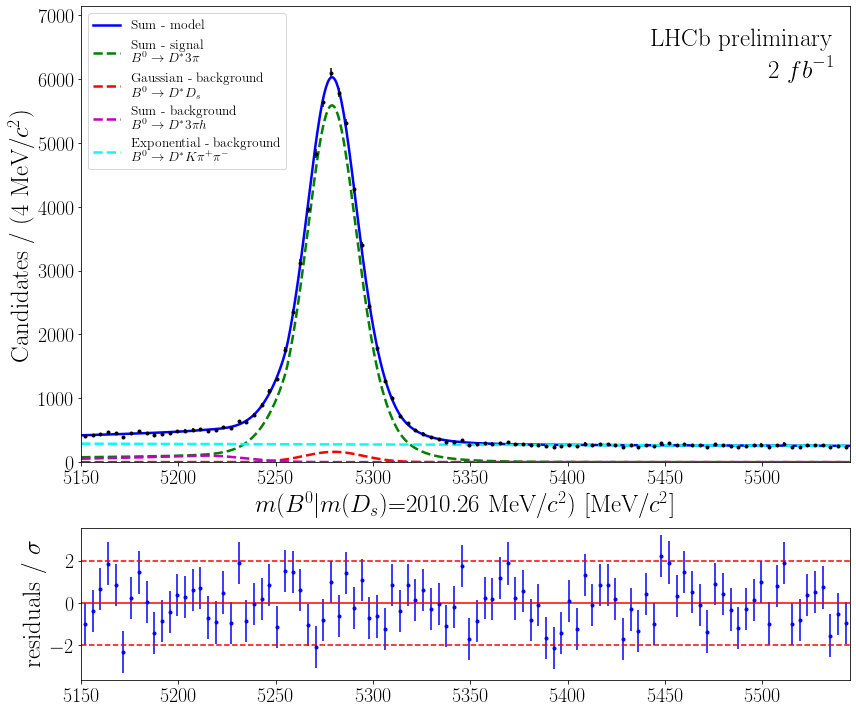

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_Dst_constr/Dst_constr_B0_M_common_Dst_constr_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($B^0|m(D_s)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

In [16]:
name_data_plot = name_data + '_details'
plot_hist_fit_particle(df, var, models = [model,[model_S_ext, crystalBallL_S, crystalBallR_S], gaussian_B0Ds_ext, model_K_ext,exp_ext],
                       name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data_plot, name_folder=name_data,
                       colors=['b','g','r','m','cyan','y'],
                        params=params,name_params=name_params,
                       fontsize_leg=13.5, show_chi2=True,
                       colWidths=[0.06,0.01,0.05,0.06],
                       show_leg=False
                      )
name_data_plot = name_data
plot_hist_fit_particle(df,var, models = [model,model_S_ext, gaussian_B0Ds_ext, model_K_ext,exp_ext],
                       name_models = ["", '\n $B^0\\to D^* 3\pi$','\n $B^0\\to D^*D_s$','\n $B^0\\to D^*3\pi h$',
                                      '\n $B^0\\to D^* K \pi^+\pi^-$','\n (combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data_plot, name_folder=name_data,
                       colors=['b','g','r','m','cyan','y'],
                       fontsize_leg=13.5, pos_text_LHC='right',
                      )

In [17]:
save_params(params,name_data, True, name_folder=name_data)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/common_Dst_constr/common_Dst_constr_params.json
